# Insurance Charges Prediction Project

## Objective
To predict insurance charges using demographic and health-related data, leveraging supervised learning techniques.

## Problem Statement
How can we accurately estimate a customer’s insurance charges based on features like age, BMI, smoking status, and region?

## Hypotheses
1. Smoking status will be a major determinant of insurance charges.
2. Charges will increase with BMI and age.

## Success Metrics
- R² Score
- Mean Absolute Error (MAE)
- Root Mean Squared Error (MSE)

## Tools and Techniques
- **Tools**: Python, Jupyter Notebook, scikit-learn, matplotlib.
- **Techniques**: Regression models, feature engineering, and hyperparameter tuning.

## Workflow
1. Load and explore the data.
2. Perform EDA and visualization.
3. Preprocess the data.
4. Train multiple models and tune hyperparameters.
5. Evaluate the models using metrics.
6. Interpret the results and draw insights.
7. Summarize findings in a report.

LOADING THE DATASET

In [3]:
# Load the dataset
import pandas as pd
file_path = "C:/Users/Admin/Desktop/Insurance_Charges_Prediction/insurance.xlsx"
insurance_df = pd.read_excel(file_path)
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Exploratory Data Analysis (EDA)
1. Check for missing values.
2. Understand the distribution of numerical features.
3. Analyze relationships between features and the target variable.


In [9]:
#CHECKING FOR MISSING VALUES
print(insurance_df.isna().sum().sort_values())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [11]:
#CHECKING FOR OTHER IMPORTANT INFO FROM THE DATA
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
#CHECK FOR THE SUMMARY STATISTICS OF NUMERICAL FEATURES
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [14]:
#CHECK FOR DUPLICATES
insurance_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

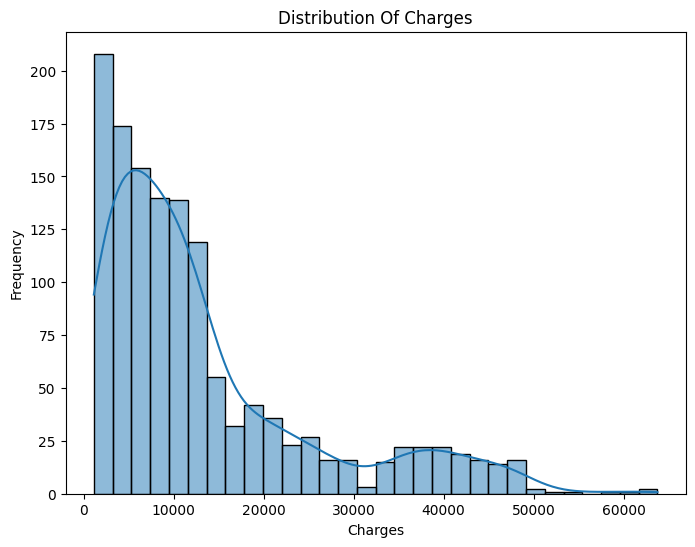

In [5]:
#Explore the Target Variable (charges)
import matplotlib.pyplot as plt
import seaborn as sns

#Distribution of insurance charges
plt.figure(figsize=(8,6))
sns.histplot(insurance_df['charges'],kde=True,bins=30)
plt.title('Distribution Of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

In [10]:
#Explore unique values for categorical features
categorical_features=insurance_df[['sex','smoker','region']]
for feature in categorical_features:
    print(f'{feature}:\n{insurance_df[feature].value_counts()}\n')

sex:
sex
male      676
female    662
Name: count, dtype: int64

smoker:
smoker
no     1064
yes     274
Name: count, dtype: int64

region:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64



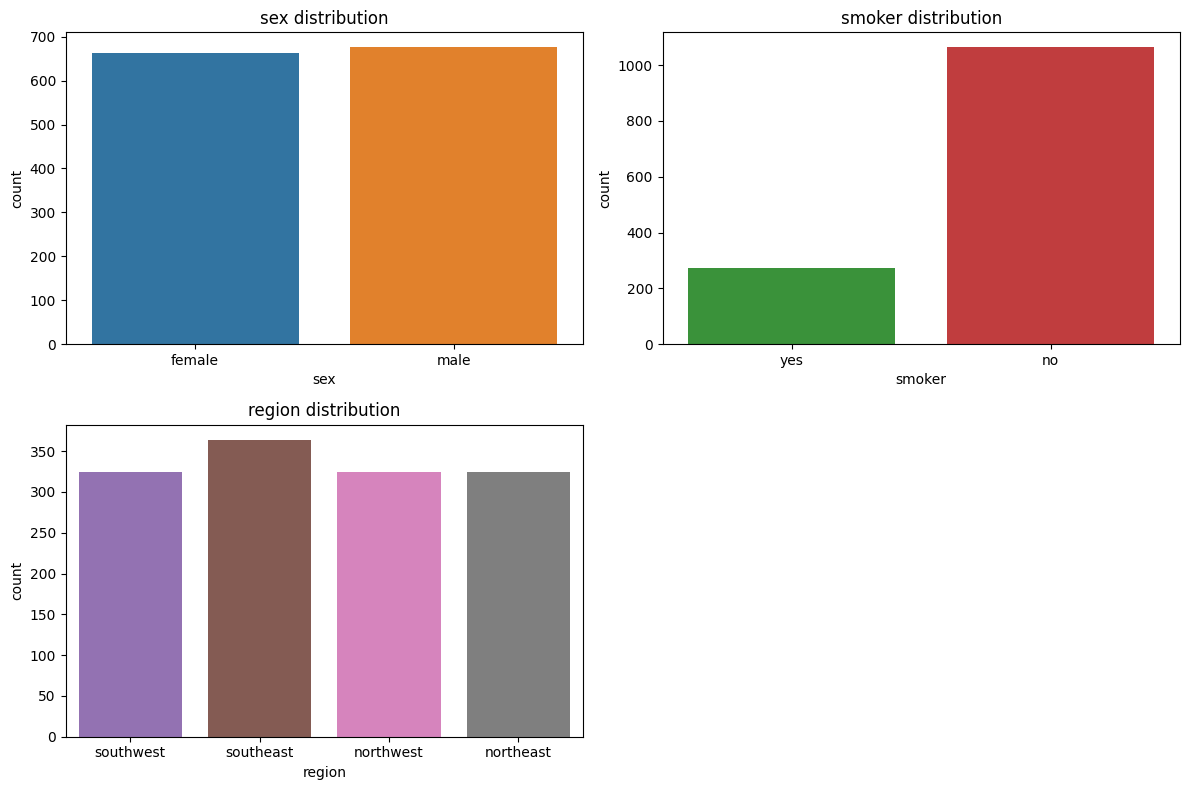

In [33]:
custom_palette = {
    'sex': ['#1f77b4', '#ff7f0e'],
    'smoker': ['#2ca02c', '#d62728'],
    'region': ['#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
}

plt.figure(figsize=(12, 8))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=feature, data=insurance_df, palette=custom_palette.get(feature, "Set2"),hue=feature, dodge=False)
    plt.title(f'{feature} distribution')
plt.tight_layout()
plt.show()


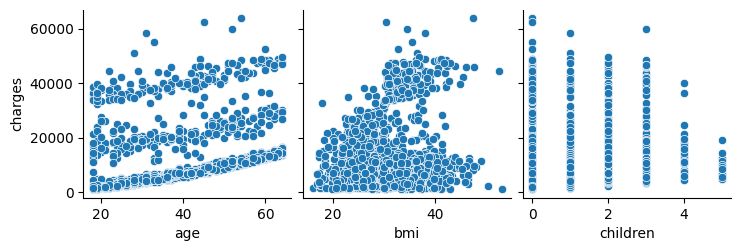

In [36]:
# Pairplot to see relationships between numerical features and target
sns.pairplot(insurance_df, x_vars=['age', 'bmi', 'children'], y_vars='charges', kind='scatter')
plt.show()


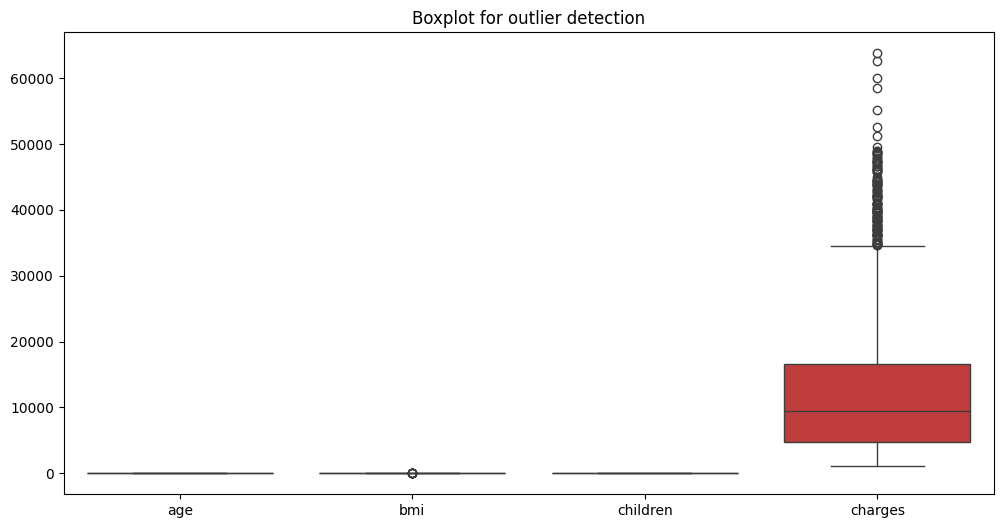

In [40]:
#Boxplot to detect outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=insurance_df,orient='v')
plt.title('Boxplot for outlier detection')
plt.show()